# Аналитика в Яндекс.Афише

## Описание проекта

Необходимо помочь маркетологам Яндекс.Афиши оптимизировать маркетинговые затраты.
В нашем распоряжении данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

Предстоит изучить:
* как люди пользуются продуктом,
* когда они начинают покупать,
* сколько денег приносит каждый клиент
* когда клиент окупается.

### План работы

1. Загрузить данные и подготовить их к анализу:


 * загрузить данные о визитах, заказах и расходах в переменные;
 * оптимизировать данные для анализа;
 * убедиться, что тип данных в каждой колонке — правильный.


2. Построить отчёты и посчитать метрики

    -Продукт:
    
    <a href='#people_day_week_month'>* Сколько людей пользуются в день, неделю, месяц?</a>
    
    <a href='#session_day'>* Сколько сессий в день?</a>
    
    <a href='#session_lenth'>* Сколько длится одна сессия?</a>
    
    <a href='#retention'>* Как часто люди возвращаются?</a>
        
    -Продажи:
    
     <a href='#when_buy'>* Когда люди начинают покупать?</a>
     
     <a href='#how_many_times_buy'>* Сколько раз покупают за период?</a>
     
     <a href='#average_check'>* Какой средний чек?</a>
     
     <a href='#revenue'>* Сколько денег приносят? (LTV)</a>
        
    -Маркетинг:
    
    <a href='#cost'>* Сколько денег потратили? Всего / на каждый источник / по времени</a>
    
    <a href='#buyer_cost'>* Сколько стоило привлечение одного покупателя из каждого источника?</a>
    
    <a href='#romi'>* На сколько окупились расходы? (ROI)</a>
       
-Отобразить <a href='#plots'>на графиках,</a> как эти метрики отличаются по устройствам и по рекламным источникам; как они меняются во времени.

3. Написать <a href='#conclusion'>вывод:</a> 

 * порекомендовать маркетологам, куда и сколько им стоит вкладывать денег; 
 * какие источники/платформы можно рекомендовать; 
 * объяснить свой выбор: на какие метрики  ориентируеся и почему; 
 * какие выводы сделаны в результате знакомства со значениями метрик.

### Шаг 1. Загрузка данных и подготовка их к анализу

In [115]:
import pandas as pd #импортируем библиотеки
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [116]:
#прочитаем первый файл, присвоим таблице имя
visits = pd.read_csv('/datasets/visits_log.csv')
visits.to_csv('visits')

In [ ]:
visits.info() #посмотрим общую информацию о таблице

In [117]:
visits.head(10) #выведем первые 10 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


Таблица visits (лог сервера с информацией о посещениях сайта) содержит столбцы:
 * Uid — уникальный идентификатор пользователя
 * Device — категория устройства пользователя
 * Start Ts — дата и время начала сессии
 * End Ts — дата и время окончания сессии
 * Source Id — идентификатор рекламного источника, из которого пришел пользователь
 
Пропусков нет, данные в столбцах со временем и датой нужно заменить с типа object на datetime64.
Названия столбцов содержат пробелы и символы в разных регистрах. Их нужно заменить.

In [118]:
#посмотрим названия столбцов
visits.columns

#заменим пробелы на нижнее подчеркивание, заглавные буквы - на строчные
visits.set_axis(['device','end_ts','source_id', 'start_ts', 'uid'], axis = 'columns', inplace = True)
visits.columns

#заменим object на datetime64
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits.info()

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Заменим в названиях столбцов пробелы на нижнее подчеркивание, заглавные буквы - на строчные с помощью set_axis.
Замену типа данных в столбцах с датой и временем произведем методом pd.to_datetime.

In [119]:
#прочитаем второй файл, присвоим таблице имя
orders = pd.read_csv('/datasets/orders_log.csv')
orders.to_csv('orders')

In [ ]:
orders.info() #посмотрим общую информацию о таблице

In [120]:
orders.head(10) #выведем первые 10 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB



,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


Таблица orders (информация о заказах) содержит столбцы:

 * Uid — уникальный id пользователя, который сделал заказ
 * Buy Ts — дата и время заказа
 * Revenue — выручка Яндекс.Афиши с этого заказа
 
Пропусков нет, данные в столбце со временем и датой нужно заменить с типа object на datetime64.
Здесь тоже названия столбцов содержат пробелы и символы в разных регистрах, что требует замены.

In [121]:
#посмотрим названия столбцов
orders.columns

#заменим пробелы на нижнее подчеркивание, заглавные буквы - на строчные
orders.set_axis(['buy_ts', 'revenue', 'uid'], axis = 'columns', inplace = True)
orders.columns

#заменим object на datetime64
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders.info()

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Заменим в названиях столбцов пробелы на нижнее подчеркивание, заглавные буквы - на строчные с помощью set_axis.
Замену типа данных в столбце с датой и временем произведем методом pd.to_datetime.

In [122]:
#прочитаем третий файл, присвоим таблице имя
costs = pd.read_csv('/datasets/costs.csv')
costs.to_csv('costs')

In [ ]:
costs.info() #посмотрим общую информацию о таблице

In [123]:
costs.head(10) #выведем первые 10 строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB



,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Таблица costs (информация о затратах на маркетинг) содержит столбцы:

 * source_id — идентификатор рекламного источника
 * dt — дата
 * costs — затраты на этот рекламный источник в этот день
 
Пропусков нет, данные в столбце со временем нужно заменить с типа object на datetime64.

In [124]:
#заменим object на datetime64
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Замену типа данных в столбце с датой произведем методом pd.to_datetime.

### ***Продукт***

### <a id='people_day_week_month'></a>Сколько людей пользуются в день, неделю, месяц?###

In [125]:
#выделим в отдельные столбцы год, месяц, неделю, полную дату
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Выясним, сколько людей пользуются продуктом в день(DAU), неделю(WAU), месяц(MAU). 
Выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [126]:
#сгруппируем данные
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print(int(dau_total))
print(int(wau_total))
print(int(mau_total))

907
5716
23228


Сгруппируем данные по уникальным пользователям и найдём среднее.
Получили, что в день продуктом в среднем пользуются 907 человек, в неделю - 5716,  в месяц - 23228.

### <a id='session_day'></a>Сколько сессий в день?###

In [127]:
#получим дату первой сессии для каждого пользователя
first_session_date_by_uid = visits.groupby('uid')['start_ts'].min() 
#first_session_date_by_uid.head()

#изменим имя столбца
first_session_date_by_uid.name = 'first_session_date'

#объединим датафрейм visits и Series first_session_date_by_uid
visits = (visits
    .join(first_session_date_by_uid,on='uid', how='left', lsuffix='_left', rsuffix='_right')
         )
visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,first_session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-27 14:06:00
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,2017-09-03 21:35:00
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,2017-06-29 09:00:00
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05,2017-11-05 15:14:00
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,7,29,2017-07-19,2017-07-19 10:41:00
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,11,45,2017-11-08,2017-11-08 13:42:00


Получим самую раннюю дату сессии. 
Сгруппируем данные таблицы visits по столбцу 'uid' методом groupby(). Для каждого пользователя получим дату его первой сессии - first_session_date_by_uid.

Получили объект Series c именем start_ts.
Поскольку в исходной таблице visits уже есть столбец start_ts, изменим имя Series на first_session_date, обратившись к атрибуту name у Series.

Методом join() объединим датафрейм visits и Series first_session_date_by_uid по столбцу 'uid'. Теперь в таблице есть столбец first_session_date с датами первой сессии пользователя.

In [128]:
#преобразуем значения столбцов по дням
visits['first_session_day'] = visits['first_session_date'].astype('datetime64[D]')
visits['start_ts_day'] = visits['start_ts'].astype('datetime64[D]')
visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,first_session_date,first_session_day,start_ts_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-03-09,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-27 14:06:00,2017-12-27,2017-12-27
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,2017-09-03 21:35:00,2017-09-03,2017-09-03
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,5,2018-01-30,2017-06-29 09:00:00,2017-06-29,2018-01-30
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,11,44,2017-11-05,2017-11-05 15:14:00,2017-11-05,2017-11-05
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,7,29,2017-07-19,2017-07-19 10:41:00,2017-07-19,2017-07-19
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,11,45,2017-11-08,2017-11-08 13:42:00,2017-11-08,2017-11-08


Сформируем когорту по дням. Выделим из столбцов first_session_date и start_ts дни. Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[D]'. 

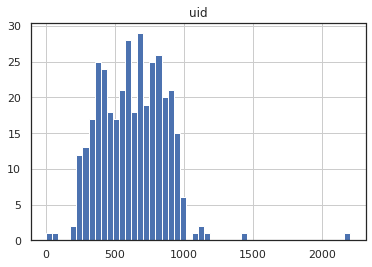

In [129]:
#сгруппируем данные, построим гистограмму
day_cohort_grouped = visits.groupby('first_session_day').agg({'uid':'nunique'}).hist(bins=50)

Когорта по дням - столбец 'first_session_day'. Сгруппируем данные по этому столбцу методом agg и посмотрим распределение.

In [130]:
#вычислим среднее
day_cohort_grouped = visits.groupby('first_session_day').agg({'uid':'nunique'}).mean()
day_cohort_grouped

uid    626.837912
dtype: float64

Распределение нормальное, поэтому можно найти среднее количество сессий в день - 626.

### <a id='session_lenth'></a>Сколько длится одна сессия?###

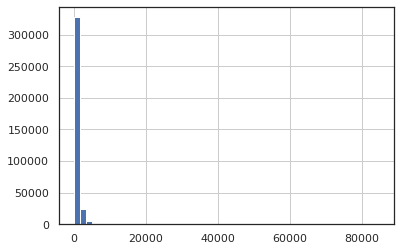

In [131]:
#посчитаем продожительность сессии, выведем гистограмму
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].hist(bins=50)

Выясним, сколько длится одна сессия. Вычтем из времени окончания сессии время ее начала в секундах, посмотрим распределение.

In [132]:
#выведем моду
visits['session_duration_sec'].mode()

0    60
dtype: int64

Распределение неравномерное, поэтому возьмем значения, которые встречаются чаще всего - моду. Она равна 60 секундам.

### <a id='retention'></a>Как часто люди возвращаются?###

In [133]:
#преобразуем значения столбцов по месяцам
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,first_session_date,first_session_day,start_ts_day,session_duration_sec,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,2017-12-20 17:20:00,2017-12-20,2017-12-20,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,2018-02-19 16:53:00,2018-02-19,2018-02-19,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,2018-03-09 20:05:00,2018-03-09,2018-05-20,1440,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,2017-12-27 14:06:00,2017-12-27,2017-12-27,0,2017-12-01
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,2017-09-01,35,2017-09-03,2017-09-03 21:35:00,2017-09-03,2017-09-03,60,2017-09-01
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,2018-01-01,5,2018-01-30,2017-06-29 09:00:00,2017-06-29,2018-01-30,3360,2017-06-01
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017,2017-11-01,44,2017-11-05,2017-11-05 15:14:00,2017-11-05,2017-11-05,60,2017-11-01
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017,2017-07-01,29,2017-07-19,2017-07-19 10:41:00,2017-07-19,2017-07-19,180,2017-07-01
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017,2017-11-01,45,2017-11-08,2017-11-08 13:42:00,2017-11-08,2017-11-08,60,2017-11-01


Выясним, как часто люди возвращаются. Для этого обратимся к Retention Rate, который показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.
Cформируем когорты по месяцам.

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01')]

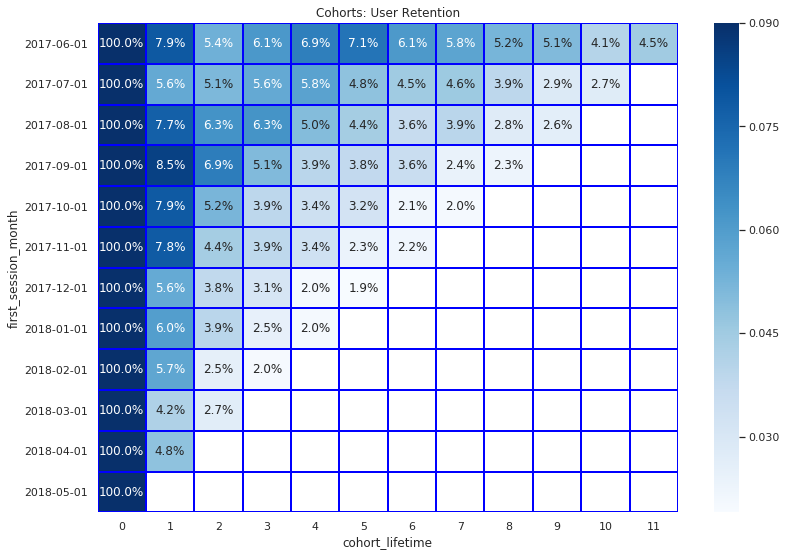

In [134]:
#рассчитаем lifetime пользователя
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

#сгруппируем данные по когорте и lifetime
cohorts = (visits
           .groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
          )

#отфильтруем число пользователей на нулевой месяц
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]

#переименуем столбец
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

#выполним объединение
cohorts = cohorts.merge(initial_users_count,on='first_session_month')

#рассчитаем Retention
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

#построим сводную таблицу
retention_pivot = (cohorts
.pivot_table(index='first_session_month',columns='cohort_lifetime', values='retention',aggfunc='sum')
                  )

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
ax = (sns.heatmap(retention_pivot, annot=True, vmax=0.09, 
      fmt='.1%', linewidths=1, linecolor='blue', cmap='Blues')
     )
ax.set_yticklabels(retention_pivot.index.date)

Для каждой строки датафрейма рассчитаем lifetime пользователя в рамках когорты.   
Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённый месяц жизни.  
Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, и на него разделить число пользователей в каждую следующую неделю.  
Найдём исходное количество пользователей в когорте: возьмём их число на нулевой месяц.  
Переименуем столбец uid в cohort_users методом rename().  
Объединим данные по когортам с исходным количеством пользователей в когорте методом merge().  
Рассчитаем Retention Rate путем деления количества активных пользователей в каждый из месяцев на исходное число пользователей в когорте.  
Построим сводную таблицу и создадим тепловую карту.  

Retention Rate в первый месяц имеет общую тенденцию к убыванию по когортам с течением времени. В сентябрьской когорте наблюдается самый высокий показатель в первый месяц -  8.5%, но затем идет спад. В июньской когорте рост retention приходитс на пятый месяц lifetime. Но по когортам Retention Rate резко снижается начиная с декабрьской. Это говорит об ухудшении качества работы сервиса. Возможно, в ноябре имели место какие-то нововведения или сбои, которые существенно повлияли на поведение клиентов.

### ***Продажи***###
### <a id='when_buy'></a>Когда люди начинают покупать?###

In [135]:
# Код наставника (временно)

# Первые визиты
first_visits = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date

# Найдем дату первой покупки каждого покупателя
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')
first_orders['first_order_week'] = first_orders['first_order_ts'].astype('datetime64[W]')

# объединяем данные о первых покупках с данными о первых сессиях
buyers = pd.merge(first_visits, first_orders, on='uid')

# Приведем типы данных
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])

# Обрати внимание, что я выделю признак (дней до первой покупки)
buyers['days_to_first_purchase'] = ((buyers['first_order_dt'] - buyers['first_session_dt']) \
                                    / np.timedelta64(1,'D')).astype('int')
buyers['days_to_first_purchase'].describe()

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_to_first_purchase, dtype: float64

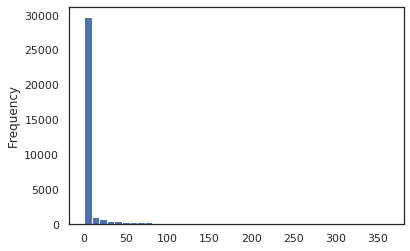

In [136]:
buyers['days_to_first_purchase'].plot(kind='hist', bins=40)

Выясним, когда люди начинают покупать. Для этого из дат первых покупок нужно вычесть даты первых визитов.  
Для начала найдем даты первых визитов: таблицу visits сгруппируем по пользователям и минимальной дате сессии (создадим first_visits).  
Затем по такому же принципу вычислим даты первых покупок: таблицу orders сгруппируем по пользователям и минимальной дате покупки (создаем first_orders). Вы делим в ней столбцы с датой первой покупки (first_order_dt), месяцем первой покупки (first_order_month) и неделей первой покупки (first_order_week).  
Объединим две получившиеся таблицы в одну (buyers) методом merge.  
Создадим в ней стоблец, содержащий количество дней до первой покупки (days_to_first_purchase), выделенных с помощью timedelta, являющийся результатом вычитания даты первой сессии из даты первой покупки.  
Построим распределение.  Оно неравномерно: большинство значений являются околонулевыми. Значит, пользователи, как правило, покупают в день первого визита. 

### <a id='how_many_times_buy'></a>Сколько раз покупают за период?###

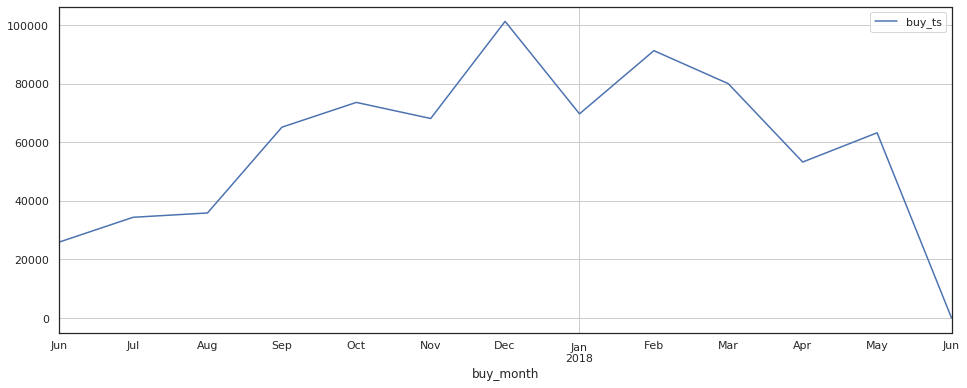

In [137]:
#объединим таблицы с визитами и покупками
visits_orders = pd.merge(visits, orders, on='uid')

#сгруппируем покупки по месяцам
visits_orders['buy_month'] = visits_orders['buy_ts'].astype('datetime64[M]')

#построим сводную таблицу
visits_orders_pivot = (visits_orders
                       .pivot_table(index='buy_month',  values='buy_ts',  aggfunc = 'count')
                      )
visits_orders_pivot.plot(figsize = (16, 6), grid = True)


Изучим, сколько раз пользователи покупают за период. В качестве периода возьмем месяц.  
Построим график, на котором видно, что больше всего покупок было совершено в декабре 2017г более 100тыс.раз) и в феврале 2018г (около 90 тыс.раз), в январе наблюдается послепрадничный спад (около 70 тыс.покупок). Меньше всего покупок было в летние месяцы (в переделах 30-40 тыс.покупок, порой и меньше).

In [138]:
#зададим имя
visits_orders_pivot.name = 'vis_ord_count'

#и посчитаем медиану
visits_orders_pivot.median()

buy_ts    65156.0
dtype: float64

Посчитаем медианное количество покупок за месячный период.  Оно составляет 65156.

### <a id='average_check'></a>Какой средний чек?###

[Text(0.5, 0, '2017-06-01'),
 Text(1.5, 0, '2017-07-01'),
 Text(2.5, 0, '2017-08-01'),
 Text(3.5, 0, '2017-09-01'),
 Text(4.5, 0, '2017-10-01'),
 Text(5.5, 0, '2017-11-01'),
 Text(6.5, 0, '2017-12-01'),
 Text(7.5, 0, '2018-01-01'),
 Text(8.5, 0, '2018-02-01'),
 Text(9.5, 0, '2018-03-01'),
 Text(10.5, 0, '2018-04-01'),
 Text(11.5, 0, '2018-05-01'),
 Text(12.5, 0, '2018-06-01')]

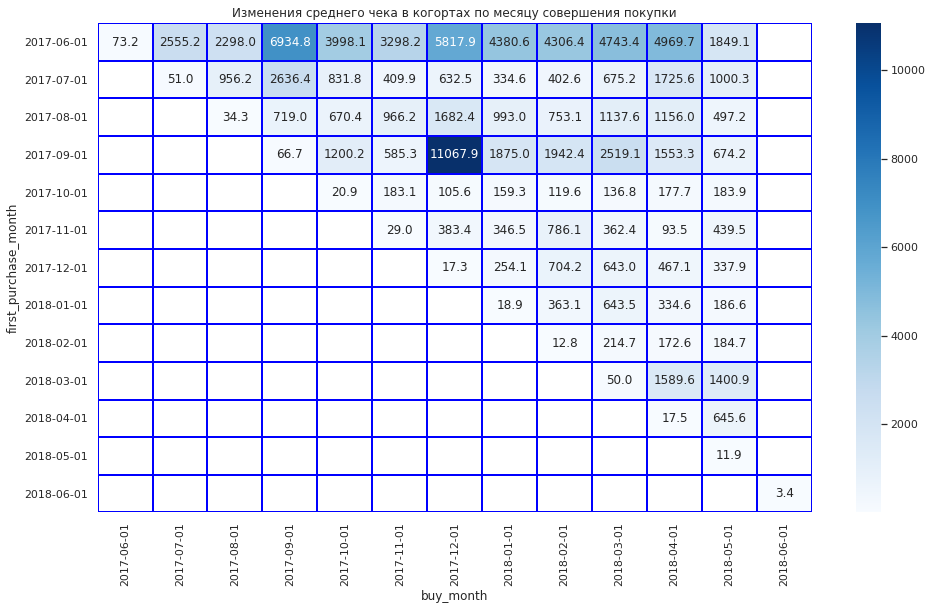

In [139]:
#найдем даты первых покупок по месяцам
first_buy_dates = visits_orders.groupby('uid')['buy_ts'].min()

#зададим имя
first_buy_dates.name = 'first_buy_datetime'

#присоединим к таблице
visits_orders = (visits_orders
                 .join(first_buy_dates,on='uid', how='left', lsuffix='_left', rsuffix='_right')
                )

#найдем покупки по месяцам
visits_orders['first_purchase_month'] = visits_orders['first_buy_datetime'].astype('datetime64[M]')

#группируем покупки по когорте
purchase_grouped_by_cohorts = (visits_orders
            .groupby(['first_purchase_month','buy_month']).agg({'revenue':'sum','uid':'nunique'})
                              )

#найдем средний чек покупателя
purchase_grouped_by_cohorts['revenue_per_user'] = (
    purchase_grouped_by_cohorts['revenue'] / purchase_grouped_by_cohorts['uid']
)

#построим сводную таблицу
purchase_pivot = (purchase_grouped_by_cohorts
     .pivot_table(index='first_purchase_month',
      columns='buy_month',values='revenue_per_user',aggfunc='mean')
                 )
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Изменения среднего чека в когортах по месяцу совершения покупки')
ax = sns.heatmap(purchase_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='blue', cmap='Blues')
ax.set_yticklabels(purchase_pivot.index.date)
ax.set_xticklabels(purchase_pivot.index.date)

In [140]:
purchase_grouped_by_cohorts['revenue_per_user'].mean()

1225.0086324942865

Найдем средний чек.   
Без учета сезонности он составляет 1225р. Для более детального представления сгруппируем данные по когорте first_buy_datetime и месяцу совершения заказа buy_month.  
Найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid.  
Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени.  
Видим, что средний чек возрастает в зимние месяцы (особенно в декабре 2017) и имеет тенденцию к спаду в летние месяцы. Высокий чек наблюдается в сентябре 2017. Но в целом просматривается тенденция к убыванию среднего чека.

### <a id='revenue'></a>Сколько денег приносят? (LTV)###

[Text(0.5, 0, '2017-06-01'),
 Text(1.5, 0, '2017-07-01'),
 Text(2.5, 0, '2017-08-01'),
 Text(3.5, 0, '2017-09-01'),
 Text(4.5, 0, '2017-10-01'),
 Text(5.5, 0, '2017-11-01'),
 Text(6.5, 0, '2017-12-01'),
 Text(7.5, 0, '2018-01-01'),
 Text(8.5, 0, '2018-02-01'),
 Text(9.5, 0, '2018-03-01'),
 Text(10.5, 0, '2018-04-01'),
 Text(11.5, 0, '2018-05-01')]

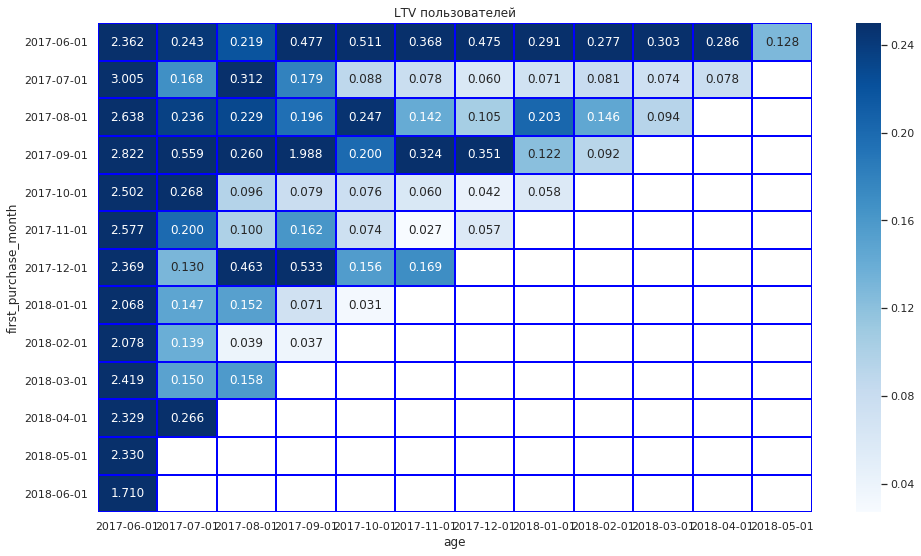

In [141]:
#выделим месяцы
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

#получим месяц первой покупки
first_orders = orders.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_purchase_month']

#посчитаем количество новых покупателей
cohort_sizes = first_orders.groupby('first_purchase_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_buyers']

#построим когорты
orders_new = pd.merge(orders,first_orders, on='uid')

#сгруппируем и сложим выручку
cohorts=orders_new.groupby(['first_purchase_month','buy_month']).agg({'revenue': 'sum'}).reset_index()

#добавим данные
report = pd.merge(cohort_sizes, cohorts, on='first_purchase_month')

#присвоим значение маржинальности
margin_rate = 0.5
 
#умножим выручку на маржинальность
report['gp'] = report['revenue'] * margin_rate

#выделим возраст когорты
report['age'] = (report['buy_month'] - report['first_purchase_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#найдем ltv
report['ltv'] = report['gp'] / report['n_buyers']
    
#составим сводную таблицу
output = report.pivot_table(index='first_purchase_month', columns='age', values='ltv', aggfunc='mean')
output.fillna('')
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('LTV пользователей')
ax=sns.heatmap(output, annot=True, fmt='.3f', vmax=0.25, linewidths=1, linecolor='blue', cmap='Blues')
ax.set_yticklabels(output.index.date)
ax.set_xticklabels(output.index.date)

Выясним, сколько денег приносят пользователи (LTV).   
Сформируем месячные когорты. Выделим месяцы из дат в таблицах с заказами и расходами методом astype.  
Получим месяц первой покупки каждого покупателя.
Посчитаем количество новых покупателей (n_buyers) за каждый месяц.  
Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами.  
Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.   
Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц.  
Найдем валовую прибыль, умножив выручку на маржинальность.  
Найдём LTV: разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Составим сводную таблицу.  


In [142]:
#отфильтруем первую когорту
ltv_201706 = output.loc['2017-06-01'].sum()
ltv_201706

5.939616905585764

Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам.  
В среднем каждый покупатель из первой когорты принес по 5.9 выручки.  

### ***CAC***###

In [143]:
# отфильруем нужную когорту
cohort_201706 = report[report['first_purchase_month'] == '2017-06-01']

# посчитаем расходы за этот месяц
costs_201706 = costs[costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)

CAC = 8.905091448344043
LTV = 5.939616905585764


Посчитаем CAC этой когорты. Поделим расходы за этот месяц на количество людей в когорте.  
Привлечение одного покупателя в среднем обошлось компании в 8.9.   
Валовая прибыль с каждого из них: 5.9. То есть вложения в привлечение покупателей не окупились.

In [144]:
# считаем расходы за месяц
monthly_costs = costs.groupby('month').sum()

#объединим данные
report_new = pd.merge(report, monthly_costs, left_on='first_purchase_month', right_on='month')

#посчитаем САС
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()

,first_purchase_month,n_buyers,buy_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


Посчитаем остальные когорты и посмотрим, сколько месяцев нужно каждой когорте, чтобы окупить маркетинговые затраты. Посчитаем CAC каждой когорты. Сначала найдём суммарные расходы за каждый месяц, а затем поделим их на количество покупателей в каждой когорте.  
Добавим данные о расходах в отчёт и посчитаем CAC.

### ***Маркетинг***###
### <a id='cost'></a>Сколько денег потратили? Всего / на каждый источник / по времени###

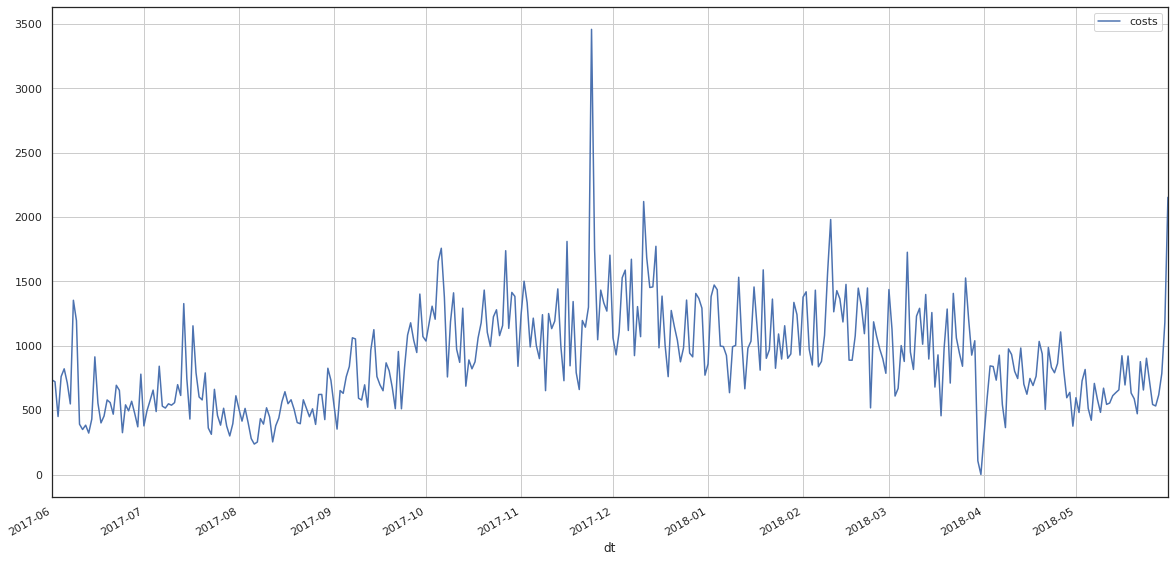

In [145]:
#вычислим сумму расходов
costs['costs'].sum()

#сгруппируем расходы по источникам
source_grouped = costs.groupby(['source_id']).agg({'costs': 'sum'})

#сгруппируем по дате, построим график
costs.groupby(['dt']).agg({'costs': 'sum'}).plot(figsize = (20, 10), grid = True)

Выясним, сколько денег потратили на маркетинг ***всего*** - посчитаем сумму по столбцу расходов.  

Чтобы посчитать, сколько потратили ***на каждый источник***, сгруппируем расходы по источникам. Видим, что больше всего потрачено на источник 3,  а меньше всего - на источники 9 и 10.  

Посчитаем, сколько потратили на маркетинг ***по времени***. Сгруппируем расходы по дате и построим график. На нем видим высокий пик в конце декабря 2017г. Вероятно, это связано с повышенными затратами на предновогоднюю рекламу. Спад расходов наблюдается в сентябре - период после лета. В целом, расходы в зимние месяцы выше. 

### <a id='buyer_cost'></a>Сколько стоило привлечение одного покупателя из каждого источника?###

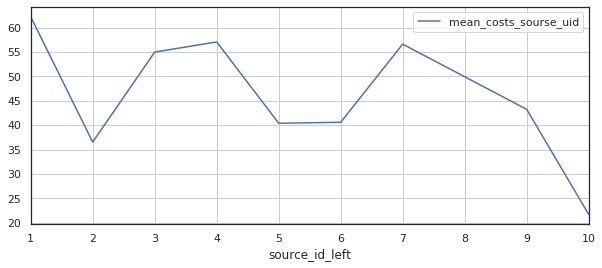

In [146]:
#объединим таблицы
visits_costs = visits.join(costs, on='source_id', how='left', lsuffix='_left', rsuffix='_right')
#сгруппируем по источникам, посчитаем сумму по пользвателям
source_uid = visits_costs.groupby('source_id_left').agg({'uid': 'count', 'costs':'sum'}).reset_index()
#создадим таблицу
source_uid.columns = ['source_id_left', 'uid', 'costs']
#создадим столбец со средней суммой затрат на пользователя по источнику
source_uid['mean_costs_sourse_uid'] = source_uid['costs'] / source_uid['uid']
#присоединим к таблице
visits_source_uid = (source_uid
                .join(visits, on='source_id_left', how='left', lsuffix='_left', rsuffix='_right')
)
(visits_source_uid.pivot_table(index = 'source_id_left', 
              values = 'mean_costs_sourse_uid', aggfunc = 'mean').plot(figsize = (10, 4), grid = True)
)

Посмотрим, сколько стоило привлечение одного покупателя из каждого источника.  
Объединим таблицы visits и costs методом merge.  
Посчитаем среднюю стоимость по источникам с помощью сводной таблицы. Построим график.  
Дороже всего стоит привлечение клиентов из первого, четвертого, седьмого и третьего источников. Ниже цена на второй, пятый, шестой, девятый и десятый источники.

### <a id='romi'></a>На сколько окупились расходы? (ROMI)###

[Text(0.5, 0, '2017-06-01'),
 Text(1.5, 0, '2017-07-01'),
 Text(2.5, 0, '2017-08-01'),
 Text(3.5, 0, '2017-09-01'),
 Text(4.5, 0, '2017-10-01'),
 Text(5.5, 0, '2017-11-01'),
 Text(6.5, 0, '2017-12-01'),
 Text(7.5, 0, '2018-01-01'),
 Text(8.5, 0, '2018-02-01'),
 Text(9.5, 0, '2018-03-01'),
 Text(10.5, 0, '2018-04-01'),
 Text(11.5, 0, '2018-05-01')]

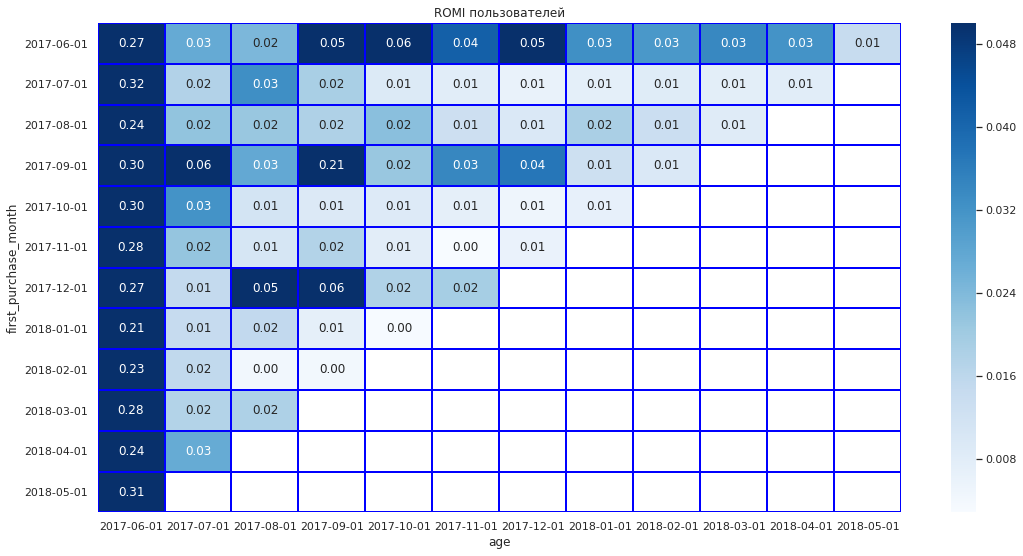

In [147]:
#рассчитаем romi
report_new['romi'] = report_new['ltv'] / report_new['cac']

#построим сводную таблицу
output_2 = report_new.pivot_table(
        index='first_purchase_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output_2.cumsum(axis=1).round(2)
output_2.fillna('')

#и тепловую карту
sns.set(style='white')
plt.figure(figsize=(18, 9))
plt.title('ROMI пользователей')
ax = (sns
    .heatmap(output_2, annot=True, fmt='.2f', vmax=0.05, linewidths=1, linecolor='blue', cmap='Blues')
     )
ax.set_yticklabels(output_2.index.date)
ax.set_xticklabels(output_2.index.date)

Выясним, на сколько окупились расходы. Поскольку мы имеем дело с маркетинговыми расходами, то будем вычислять ROMI. Вызовем метод cumsum().
Видим, что когорты окупаются очень слабо. Чуть лучше остальных окупился сентябрь, благодаря большой выручке этого месяца, также июнь и декабрь. Но результаты всё равно не дотягивают до приемлемых. 

In [148]:
#посчитаем средний ROMI когорт
output.cumsum(axis=1).mean(axis=0)

age
0     2.400841
1     2.697833
2     2.910905
3     3.344881
4     3.649317
5     3.984526
6     4.193843
7     4.541791
8     5.031042
9     4.625670
10    5.002308
11    5.939617
dtype: float64

Посчитав среднюю когорту, видим тенденцию к увеличению окупаемости, но она довольно слабая.

### <a id='plots'></a>Отобразить на графиках, как эти метрики отличаются по устройствам и по рекламным источникам###

Раздел содержит графики, отображающие динамику во времени ( по месяцам) следующих метрик:

 * затраты на привлечение клиентов с разных устройств;
 * затраты на привлечение клиентов из разных источников;
 * выручки по источникам;
 * ROMI по источникам;
 * ROMI по устройствам.

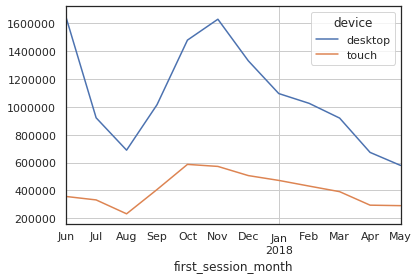

In [149]:
#построим сводную таблицу и график
(visits_costs.pivot_table(index = 'first_session_month', 
                          columns = 'device', values = 'costs', aggfunc = 'sum').plot(grid = True)
)

Отобразим на графике, сколько всего денег потратили по месяцам на пользователей, заходящих с различных устройств.  
На нем видно, что больше денег тратилось на привлечение клиентов со стационарных компьютеров. Пик затрат приходится на октябрь-ноябрь-декабрь для пользователей устройств любого типа. В августе, наоборот, наблюдаем спад, особенно выраженный дл компьютеров. Следующий спад затрат, начиная с декабря, является плавным.

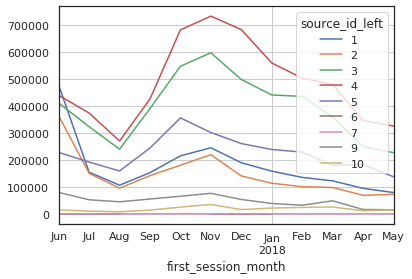

In [150]:
#построим сводную таблицу и график
(visits_costs.pivot_table(index = 'first_session_month', 
                columns = 'source_id_left', values = 'costs', aggfunc = 'sum').plot(grid = True)
)

Посмотрим график затрат на разные рекламные источники. Видим, что больше всего было потрачено на 4 источник, далее (по убыванию) 3, 5, 1, 2, 9, 10 и 7. Последние три источника почти не претерпевали изменений в затратах. У остальных наблюдается уже замеченный выше спад в августе и пик на октябре-декабре.

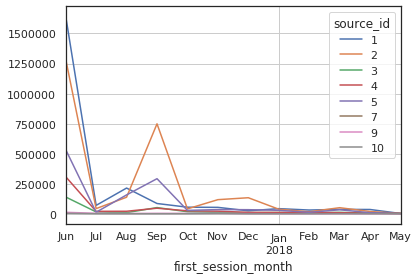

In [151]:
#построим сводную таблицу и график
(visits_orders.pivot_table(index = 'first_session_month', 
                columns = 'source_id', values = 'revenue', aggfunc = 'sum').plot(grid = True)
)

Сравним это распределение с графиком выручки по источникам. Видим, что выручка внезапно падает в июле по всем источникам сразу. Затем есть подъем к сентябрю, он наиболее выражен по второму источнику, а также пятому. Первый источник поднимается в августе. Также небольшое повышение уровня вырчки имеет второй источник в ноябре-декабре. Остальные неизменно пребывают на низком уровне.

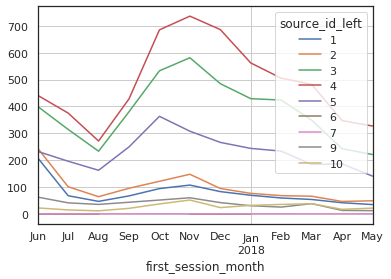

In [152]:
#соединим таблицу посещенией и romi
visits_romi = (visits
                .join(report_new, on='source_id', how='left', lsuffix='_left', rsuffix='_right')
)
(visits_romi.pivot_table(index = 'first_session_month', 
                columns = 'source_id_left', values = 'romi', aggfunc = 'sum').plot(grid = True)
)

Изучим, как помесячно менялся ROMI по источникам. Наблюдаем подъем с октября по декабрь и спады в летние месяцы.

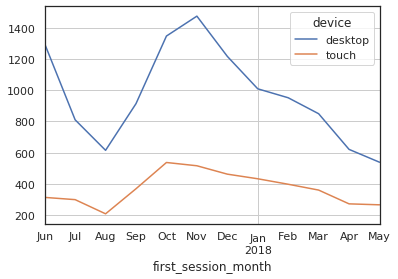

In [153]:
#построим график
(visits_romi.pivot_table(index = 'first_session_month', 
                columns = 'device', values = 'romi', aggfunc = 'sum').plot(grid = True)
)

Рассмотрим, как помесячно менялся ROMI по устройствам. Для компьютеров этот показатель значительно выше и более неоднороден: скачок между августом и ноябрем-декабрем ярко выражен. ROMI по мобильным устройствам более стабилен, хотя и имеет подъем от августа к октябрю, далее держится более-менее стабильно, понемногу снижаясь.

### <a id='conclusion'></a>Общий вывод###

Исходя из проделанного анализа данных, ситуация в данный момент не является благополучной. Окупаемость затрат крайне мала. 
Валовая прибыль с покупателя меньше, чем затраты на него. По когортам Retention Rate резко снижается начиная с декабрьской. 
Нужно пересматривать принципы распределения затрат и проверять работу мобильной версии сервиса.

Стоило бы вложить средства в рекламу в летние месяцы, поскольку в этот период наблюдается снижение среднего чека,
как следствие - снижение окупаемости, а также уменьшение количества удержанных клиентов. 
ROMI (возврат на инвестиции в маркетинг) довольно высок в зимние месяцы, чего нельзя сказать о летних. 
Эта закономерность проявляется на всех типах устройств и касается клиентов, привлеченных из разных источников.

Нужно уделить больше внимания продвижению продукта на мобильных устройствах, так как уровень удержания 
клиентов по ним значительно ниже, чем по стационарным компьютерам. 
Возможно, нужно улучшить интерфейс и обеспечить более комфортную работу с мобильной версией.

Что касается источников привлечения пользователей, то здесь тоже необходимо пересмотреть приоритеты.
Исходя из результатов изучения данных, на 4 источник было потрачено много средств, но эти вложения не оправдались.
Это же можно сказать о третьем источнике.  
Наиболее перспективным в плане окупаемости является привлечение клиентов через 2 источник, 
а также пятый и немного в меньшей степени - первый. В их развитие нужно вложить больше средств.